<style type="text/css">
table td{
border:none;
}
</style>

<table>
    <tr>
        <td width=15%><img src="../img/logoIGE_Color_Light.jpg"></img></td>
        <td>
            <center>
                <h1>Machine Learning for prediciting RX localization</h1> <br>
                May - July 2022 <br>
                IGE internship
            </center>
            Renan MANCEAUX <br>
            Supervisor :<br>
            Thomas CHAUVE
        </td>
        <td width=20%><img src="../img/logo_UGA_imag.png"></img></td>
    </tr>
</table>

<center><h1> Data exploration</h1></center>

----------------------------

<center> <h1> Data description </h1> </center>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("../")
import utils

import xarray as xr
import xarrayaita.aita as xa
import pickle

In [2]:
data = utils.load_data("../data/for_learning/CI02.npy")

file = open('../data/craft/CI02.xr', 'rb')
ds = pickle.load(file)
file.close()

In [3]:
ds

<xarray.Dataset>
Dimensions:      (y: 533, x: 480, uvecs: 2, time: 1, sT: 6, g: 12)
Coordinates:
  * y            (y) float64 0.0 0.15 0.3 0.45 0.6 ... 79.35 79.5 79.65 79.8
  * x            (x) float64 0.0 0.15 0.3 0.45 0.6 ... 71.4 71.55 71.7 71.85
Dimensions without coordinates: uvecs, time, sT, g
Data variables:
    orientation  (y, x, uvecs) float64 5.15 1.439 5.15 ... 1.561 2.093 1.561
    quality      (y, x) float64 100.0 100.0 100.0 100.0 ... 100.0 100.0 100.0
    micro        (y, x) bool True True True True True ... True True True True
    grainId      (y, x) float32 9.0 9.0 9.0 9.0 9.0 ... 73.0 73.0 73.0 73.0 73.0
    strain       (time, y, x, sT) float64 0.01126 -0.01184 ... -0.003212
    stress       (time, y, x, sT) float64 -1.957 0.7285 -1.49 ... 0.1843 0.1141
    gamma        (time, y, x, g) float64 0.02362 -0.01054 ... -6.69e-06
Attributes:
    unit:       millimeters
    step_size:  0.15
    path_dat:   data/CraFT/CI02/CI02_micro.vtk
    simu_time:  01.92500000e+04

In [4]:
data

Y  dist2GB  dist2TJ    schmid  diff_schmid  misangle  eqStrain  \
0       0      0.0      1.0  0.395254     0.103993  0.391022  0.015412   
1       0      0.0      0.0  0.395254     0.103993  0.391022  0.016234   
2       0      0.0      1.0  0.395254     0.103993  0.391022  0.009668   
3       0      0.0      2.0  0.395254     0.103993  0.391022  0.013143   
4       0      0.0      3.0  0.395254     0.103993  0.391022  0.013521   
...    ..      ...      ...       ...          ...       ...       ...   
255835  0      0.0      3.0  0.432296     0.033262  0.252094  0.009866   
255836  0      0.0      2.0  0.432296     0.033262  0.252094  0.005627   
255837  0      0.0      1.0  0.432296     0.033262  0.252094  0.005517   
255838  0      0.0      0.0  0.432296     0.033262  0.252094  0.010359   
255839  0      0.0      1.0  0.432296     0.033262  0.252094  0.014877   

        eqStress        act_pr        act_py      work  
0       2.344376  4.531981e-06  1.011138e-06  0.003950  
1       2.400504  4.607910e-07  1.237610e-06  0.003692  
2       2.570231  1.110663e-06  9.871840e-08  0.001585  
3       2.546861  1.274664e-06  9.265364e-09  0.001447  
4       2.653873  8.023945e-07  3.393400e-11  0.001319  
...          ...           ...           ...       ...  
255835  0.702662  1.342906e-06  2.662732e-13  0.000779  
255836  0.740925  1.315377e-06  6.788590e-13  0.000375  
255837  1.467539  1.497212e-06  1.407731e-14  0.000479  
255838  1.968252  1.425730e-06  2.844993e-10  0.000894  
255839  1.612373  1.132847e-06  7.408479e-11  0.001206  

[255840 rows x 11 columns]

In [5]:
ds['dist2GB'] = xr.DataArray(np.array(data.dist2GB).reshape((ds.dims['y'],ds.dims['x'])),dims=('y','x'))
ds['dist2TJ'] = xr.DataArray(np.array(data.dist2TJ).reshape((ds.dims['y'],ds.dims['x'])),dims=('y','x'))
ds['schmid'] = xr.DataArray(np.array(data.schmid).reshape((ds.dims['y'],ds.dims['x'])),dims=('y','x'))
ds['diff_schmid'] = xr.DataArray(np.array(data.diff_schmid).reshape((ds.dims['y'],ds.dims['x'])),dims=('y','x'))
ds['misangle'] = xr.DataArray(np.array(data.misangle).reshape((ds.dims['y'],ds.dims['x'])),dims=('y','x'))
ds['eqStrain'] = xr.DataArray(np.array(data.eqStrain).reshape((ds.dims['y'],ds.dims['x'])),dims=('y','x'))
ds['eqStress'] = xr.DataArray(np.array(data.eqStress).reshape((ds.dims['y'],ds.dims['x'])),dims=('y','x'))
ds['act_pr'] = xr.DataArray(np.array(data.act_pr).reshape((ds.dims['y'],ds.dims['x'])),dims=('y','x'))
ds['act_py'] = xr.DataArray(np.array(data.act_py).reshape((ds.dims['y'],ds.dims['x'])),dims=('y','x'))
ds['work'] = xr.DataArray(np.array(data.work).reshape((ds.dims['y'],ds.dims['x'])),dims=('y','x'))
ds['RX'] = xr.DataArray(np.array(data.Y).reshape((ds.dims['y'],ds.dims['x'])),dims=('y','x'))

(-0.075, 71.92499999999998, -0.075, 79.875)

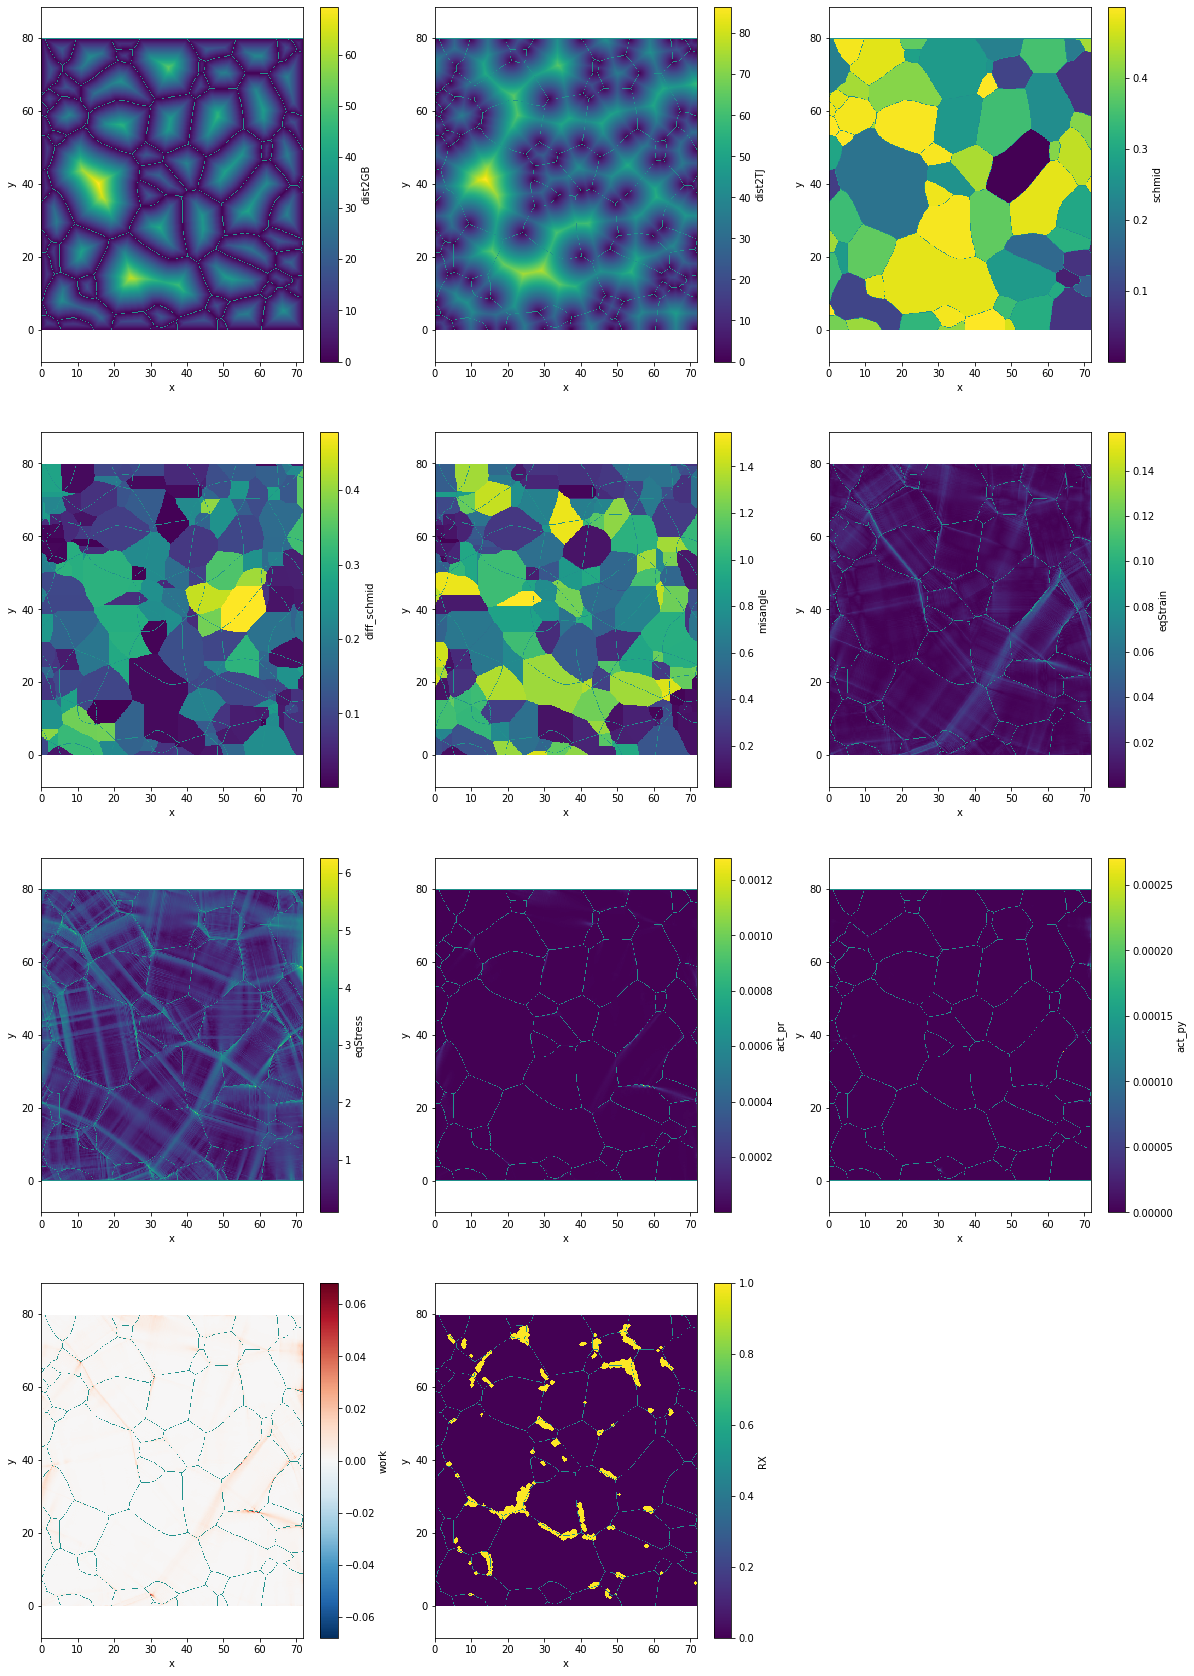

In [6]:
plt.figure(figsize=(20,30))
plt.subplot(431)
ds.dist2GB.plot()
ds.aita.plotBoundary()
plt.axis('equal')
plt.subplot(432)
ds.dist2TJ.plot()
ds.aita.plotBoundary()
plt.axis('equal')
plt.subplot(433)
ds.schmid.plot()
ds.aita.plotBoundary()
plt.axis('equal')
plt.subplot(434)
ds.diff_schmid.plot()
ds.aita.plotBoundary()
plt.axis('equal')
plt.subplot(435)
ds.misangle.plot()
ds.aita.plotBoundary()
plt.axis('equal')
plt.subplot(436)
ds.eqStrain.plot()
ds.aita.plotBoundary()
plt.axis('equal')
plt.subplot(437)
ds.eqStress.plot()
ds.aita.plotBoundary()
plt.axis('equal')
plt.subplot(438)
ds.act_pr.plot()
ds.aita.plotBoundary()
plt.axis('equal')
plt.subplot(439)
ds.act_py.plot()
ds.aita.plotBoundary()
plt.axis('equal')
plt.subplot(4,3,10)
ds.work.plot()
ds.aita.plotBoundary()
plt.axis('equal')
plt.subplot(4,3,11)
ds.RX.plot()
ds.aita.plotBoundary()
plt.axis('equal')

# Correlation matrix

In [8]:
import pandas as pd
CI02 = utils.load_data("../data/for_learning/CI02.npy")
CI04 = utils.load_data("../data/for_learning/CI04.npy")
CI06 = utils.load_data("../data/for_learning/CI06.npy")
CI09 = utils.load_data("../data/for_learning/CI09.npy")
CI21 = utils.load_data("../data/for_learning/CI21.npy")

X = pd.concat((CI02,CI04,CI06,CI09,CI21))

Text(0.5, 1.0, 'Correlation Matrix')

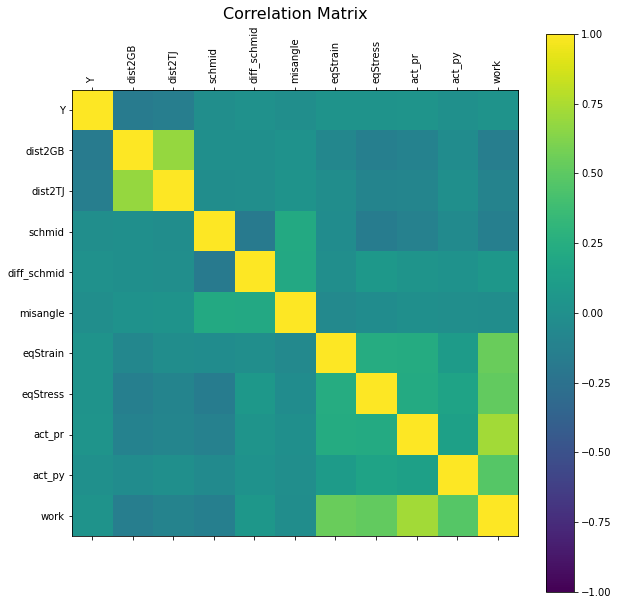

In [10]:
f = plt.figure(figsize=(10,10))
plt.matshow(X.corr(),fignum=f.number,vmin=-1,vmax = 1)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.yticks(range(X.shape[1]), X.columns)
cb = plt.colorbar()
plt.title('Correlation Matrix', fontsize=16)